Task 1: Regression Analysis

Description: 
Perform a simple linear regression analysis to predict one variable based on another.

Objectives:
Split the dataset into training and testing sets.
Fit a linear regression model using scikit-learn. Interpret the coefficients and evaluate the model using metrics such as R-squared and mean squared error.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
data=pd.read_csv("Stock Prices Data Set.csv")

In [13]:
data.head

<bound method NDFrame.head of        symbol        date      open      high       low     close    volume
0         AAL  2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943
1        AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957
2         AAP  2014-01-02  110.3600  111.8800  109.2900  109.7400    542711
3        ABBV  2014-01-02   52.1200   52.3300   51.5200   51.9800   4569061
4         ABC  2014-01-02   70.1100   70.2300   69.4800   69.8900   1148391
...       ...         ...       ...       ...       ...       ...       ...
497467    XYL  2017-12-29   68.5300   68.8000   67.9200   68.2000   1046677
497468    YUM  2017-12-29   82.6400   82.7100   81.5900   81.6100   1347613
497469    ZBH  2017-12-29  121.7500  121.9500  120.6200  120.6700   1023624
497470   ZION  2017-12-29   51.2800   51.5500   50.8100   50.8300   1261916
497471    ZTS  2017-12-29   72.5500   72.7600   72.0400   72.0400   1704122

[497472 rows x 7 columns]>

In [14]:
data.columns

Index(['symbol', 'date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [15]:
stock_data = data[data["symbol"] == "AAPL"].copy()


In [16]:
stock_data = stock_data.dropna(subset=["open", "close"])


In [17]:
X = stock_data[["open"]]   
y = stock_data["close"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)


In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [22]:
print("Intercept:", model.intercept_)
print("Coefficient (slope):", model.coef_[0])
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Intercept: 0.20567672480868282
Coefficient (slope): 0.9985127260680378
Mean Squared Error: 1.842077368434365
R-squared: 0.9968009155889239


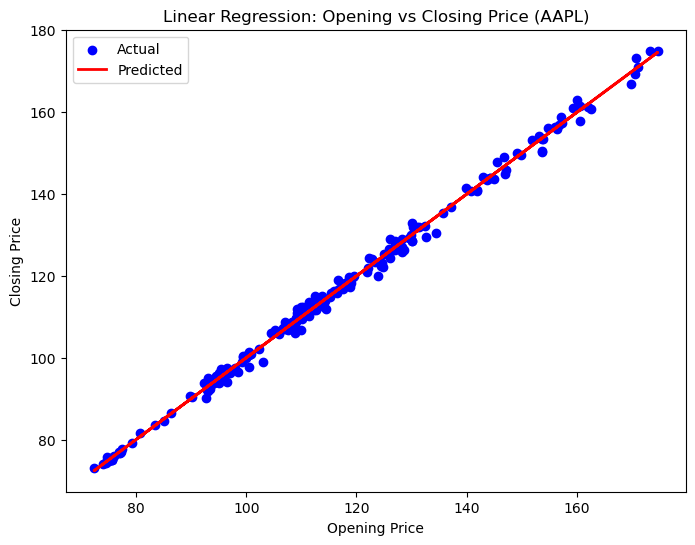

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted")
plt.xlabel("Opening Price")
plt.ylabel("Closing Price")
plt.title("Linear Regression: Opening vs Closing Price (AAPL)")
plt.legend()
plt.show()


Task 2: Time Series Analysis

Description:
Analyze a time-series dataset (e.g., stock prices, temperature data) to detect trends and seasonality.

Objectives:
Plot time-series data and identify patterns. Decompose the series into trend, seasonality, and residuals using statsmodels.
Perform moving average smoothing and plot the results.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv("Stock Prices Data Set.csv")

In [2]:
data.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [3]:
data['date'] = pd.to_datetime(data['date'])

In [4]:
aapl = data[data['symbol'] == 'AAPL'].copy()
aapl.set_index('date', inplace=True)

In [5]:
aapl.sort_index(inplace=True)

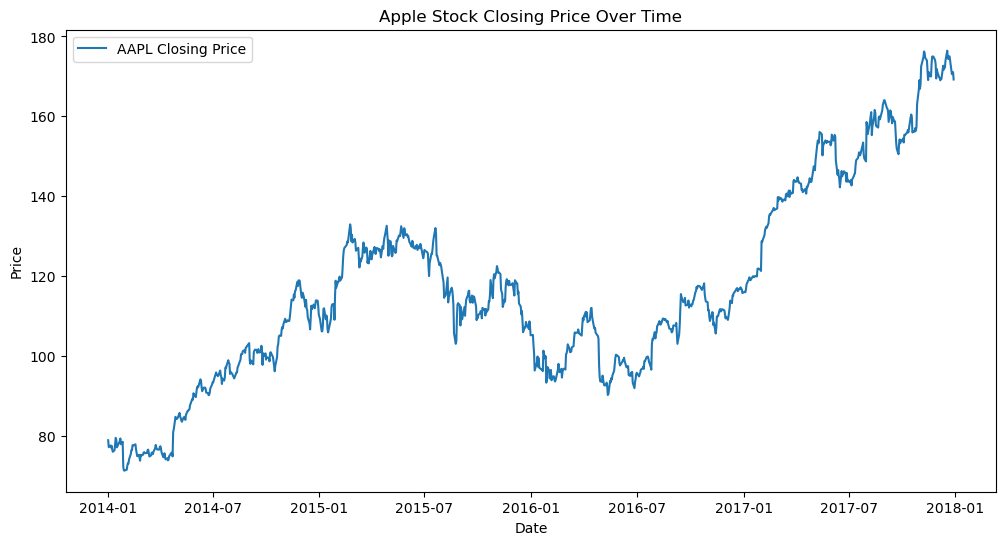

In [6]:
plt.figure(figsize=(12,6))
plt.plot(aapl['close'], label='AAPL Closing Price')
plt.title('Apple Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

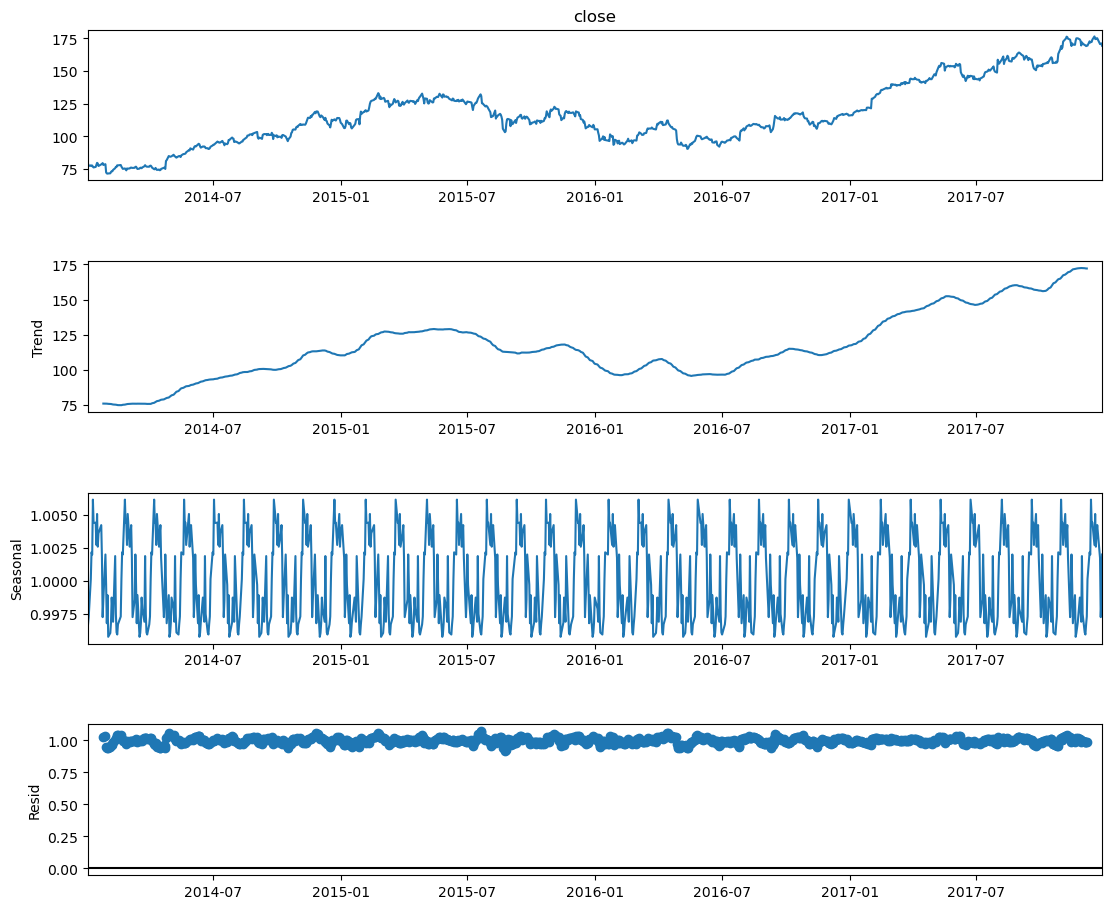

In [7]:
# Decompose the time series (using monthly frequency)
decomposition = seasonal_decompose(aapl['close'], model='multiplicative', period=30)
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

In [8]:
aapl['moving_avg_30'] = aapl['close'].rolling(window=30).mean()

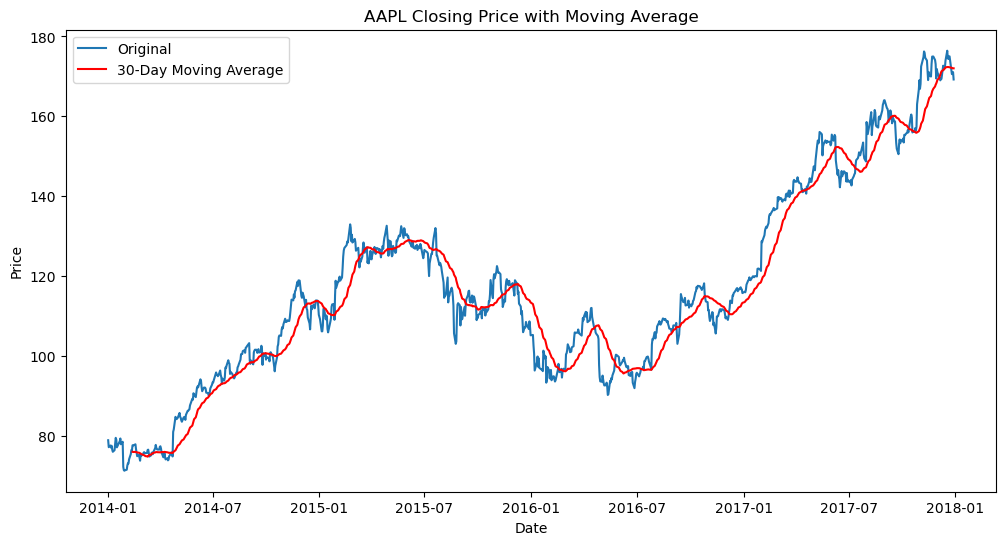

In [9]:
plt.figure(figsize=(12,6))
plt.plot(aapl['close'], label='Original')
plt.plot(aapl['moving_avg_30'], label='30-Day Moving Average', color='red')
plt.title('AAPL Closing Price with Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Task 3: Clustering Analysis (KMeans)

Description:
Implement K-Means clustering to group similar data points together based on feature similarities.

Objectives:
Standardize the dataset (e.g., using StandardScaler). Apply K-Means clustering and determine the optimal number of clusters using the elbow method.
Visualize clusters using 2D scatter plots.
Tools: Python, scikit-learn, matplotlib, seaborn.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [11]:
data=pd.read_csv("Sentiment dataset.csv")

In [12]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [13]:
features = data[["Retweets", "Likes", "Hour"]]

In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [16]:
# Elbow method to find optimal k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


C:\Users\yashc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


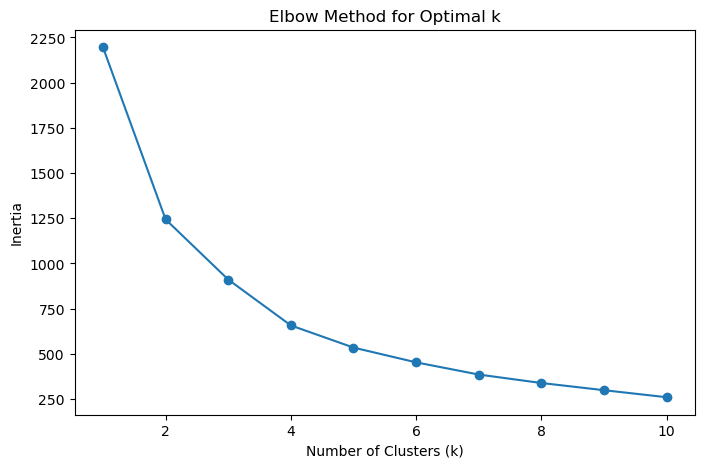

In [17]:
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [18]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(scaled_features)

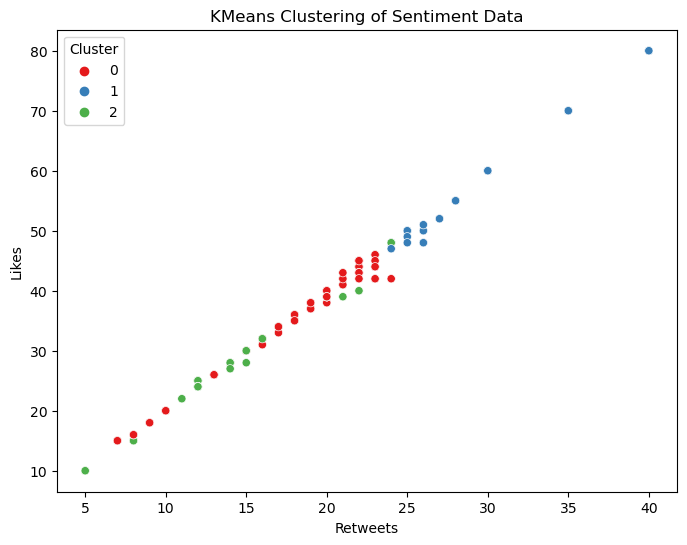

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Retweets', y='Likes', hue='Cluster', palette='Set1')
plt.title('KMeans Clustering of Sentiment Data')
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.show()